In [2]:
import boto3
import json
#This script compares the differences in outputs between foundation models. 
# Importing boto3, the AWS SDK for Python, which allows us to interact with AWS services.
# Importing json, though not directly used in the current script, is often useful for handling JSON data in AWS responses.

# Initialize the Bedrock client with AWS SDK (boto3)
# The Bedrock client is being initialized with boto3, specifying 'us-east-1' as the AWS region.
# This client will allow us to interact with the Bedrock service, which provides access to various foundation models.

client = boto3.client('bedrock', region_name='us-east-1')

def list_models():
    """
    This function fetches and lists all foundation models available from the Bedrock service.
    It handles exceptions to ensure that any issues during the API call are caught and reported.
    """
    try:
        # Call the list_foundation_models method from the Bedrock client
        # This method retrieves a list of all available foundation models in the Bedrock service.
        response = client.list_foundation_models()
        
        # Check if 'foundationModels' key is in the response dictionary
        # The response should contain a 'foundationModels' key, which holds the list of models.
        if 'foundationModels' in response:
            # Iterate through each model in the list of foundation models
            # For each model, the function extracts and prints the model's ID and name.
            for model in response['foundationModels']:
                # Print model details including ID and Name
                print(f"Model ID: {model['modelId']}, Model Name: {model['modelName']}")
        else:
            # Print a message if the response does not contain 'foundationModels'
            # If the expected key is not present in the response, this message alerts the user to the unexpected format.
            print(f"Unexpected response format: {response}")
    except Exception as e:
        # Print an error message if an exception occurs
        # Any exceptions raised during the API call are caught here, and an error message is printed.
        print(f"Error listing models: {e}")

# Call the function to list available models
# This line executes the list_models function, triggering the process to retrieve and display the available foundation models.
list_models()



Unexpected response format: {'ResponseMetadata': {'RequestId': 'd5a98cd9-bc72-41f1-9072-8da2422ff5d8', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Mon, 12 Aug 2024 18:10:48 GMT', 'content-type': 'application/json', 'content-length': '26339', 'connection': 'keep-alive', 'x-amzn-requestid': 'd5a98cd9-bc72-41f1-9072-8da2422ff5d8'}, 'RetryAttempts': 0}, 'modelSummaries': [{'modelArn': 'arn:aws:bedrock:us-east-1::foundation-model/amazon.titan-tg1-large', 'modelId': 'amazon.titan-tg1-large', 'modelName': 'Titan Text Large', 'providerName': 'Amazon', 'inputModalities': ['TEXT'], 'outputModalities': ['TEXT'], 'responseStreamingSupported': True, 'customizationsSupported': [], 'inferenceTypesSupported': ['ON_DEMAND'], 'modelLifecycle': {'status': 'ACTIVE'}}, {'modelArn': 'arn:aws:bedrock:us-east-1::foundation-model/amazon.titan-image-generator-v1:0', 'modelId': 'amazon.titan-image-generator-v1:0', 'modelName': 'Titan Image Generator G1', 'providerName': 'Amazon', 'inputModalities': ['TEXT', 

In [3]:
import boto3
import json

# Importing boto3, the AWS SDK for Python, which allows interaction with AWS services.
# Importing json for handling JSON data, which is crucial for formatting requests and parsing responses.

# Initialize the Bedrock client
# The Bedrock runtime client is initialized with boto3, specifying 'us-east-1' as the AWS region.
# This client will be used to invoke the foundation models available in Bedrock.
client = boto3.client('bedrock-runtime', region_name='us-east-1')

def invoke_model(prompt_text):
    """
    This function invokes a specific foundation model using the Bedrock runtime service.
    It takes a prompt as input, sends it to the model, and returns the model's response.
    """
    try:
        # Calling the invoke_model method from the Bedrock runtime client
        # The method sends a request to the specified model with the provided prompt text.
        response = client.invoke_model(
            modelId='meta.llama3-8b-instruct-v1:0',  # Specifies the model to invoke
            contentType='application/json',  # Sets the content type of the request
            accept='application/json',  # Specifies the expected content type of the response
            body=json.dumps({
                'prompt': prompt_text  # The prompt text is passed as a JSON-formatted string
            })
        )
        # Parsing the response body from JSON to a Python dictionary
        result = json.loads(response['body'].read().decode('utf-8'))
        return result  # Returns the parsed response
    except Exception as e:
        # Catches and prints any exceptions that occur during the model invocation
        print(f"Error invoking model: {e}")
        return None  # Returns None if an error occurs

# Example usage
# This section demonstrates how to use the invoke_model function with a sample prompt.
prompt = "Tell me an interesting fact about Tesla and Elon Musk"
result = invoke_model(prompt)
if result:
    # If the model invocation is successful, proceed to parse the response
    print("Model invocation successful. Parsing response...")
    print("Raw response body:", result)
    if 'completions' in result and result['completions']:
        # Checks if the response contains generated text under the 'completions' key
        generated_text = result['completions'][0]['data']['text']
        print("Generated text:", generated_text)  # Prints the generated text
    else:
        # If no text is generated in the response, this message is printed
        print("No text generated in the response.")
else:
    # If the model invocation fails, this message is printed
    print("Model invocation failed.")


Model invocation successful. Parsing response...
Raw response body: {'generation': ".\nElon Musk is a fascinating figure, and Tesla is an innovative company that has disrupted the automotive industry. Here's an interesting fact:\nDid you know that Tesla's Autopilot system, which is a semi-autonomous driving feature, was initially developed by a team led by Chris Lattner, a computer scientist who was previously the chief architect of Apple's Swift programming language? Lattner joined Tesla in 2015 and led the development of Autopilot, which has since become a key feature of Tesla's vehicles. In 2017, Lattner left Tesla to start a new company, called Optimus, which is focused on developing artificial intelligence and machine learning technologies.\n\nElon Musk is also known for his ambitious goals and vision for the future. For example, he has stated that he wants to make humanity a multi-planetary species, and has even founded SpaceX, a private aerospace company, to help achieve this go

In [4]:
import boto3
import json

# Importing boto3, the AWS SDK for Python, which allows us to interact with AWS services.
# Importing json to handle JSON data, which is used for formatting requests and parsing responses.

# Initialize the Bedrock client
# The Bedrock runtime client is initialized with boto3, specifying 'us-east-1' as the AWS region.
# This client will be used to invoke the foundation models available in Bedrock.
client = boto3.client('bedrock-runtime', region_name='us-east-1')

def invoke_model(prompt_text):
    """
    This function invokes a specific foundation model using the Bedrock runtime service.
    It takes a prompt as input, sends it to the model, and returns the model's response.
    """
    try:
        # Calling the invoke_model method from the Bedrock runtime client
        # This method sends a request to the specified model with the provided prompt text.
        response = client.invoke_model(
            modelId='amazon.titan-text-lite-v1',  # Specifies the model to invoke
            contentType='application/json',  # Sets the content type of the request
            accept='application/json',  # Specifies the expected content type of the response
            body=json.dumps({
                'inputText': prompt_text  # The prompt text is passed as a JSON-formatted string under the key 'inputText'
            })
        )
        # Parsing the response body from JSON to a Python dictionary
        result = json.loads(response['body'].read().decode('utf-8'))
        return result  # Returns the parsed response
    except Exception as e:
        # Catches and prints any exceptions that occur during the model invocation
        print(f"Error invoking model: {e}")
        return None  # Returns None if an error occurs

# Example usage
# This section demonstrates how to use the invoke_model function with a sample prompt.
prompt = "Tell me an interesting fact about Tesla and Elon Musk"
result = invoke_model(prompt)
if result:
    # If the model invocation is successful, proceed to parse the response
    print("Model invocation successful. Parsing response...")
    print("Raw response body:", result)
    if 'results' in result and result['results']:
        # Checks if the response contains generated text under the 'results' key
        generated_text = result['results'][0]['outputText']
        print("Generated text:", generated_text)  # Prints the generated text
    else:
        # If no text is generated in the response, this message is printed
        print("No text generated in the response.")
else:
    # If the model invocation fails, this message is printed
    print("Model invocation failed.")



Model invocation successful. Parsing response...
Raw response body: {'inputTextTokenCount': 10, 'results': [{'tokenCount': 48, 'outputText': '\nElon Musk is the CEO and chief engineer of SpaceX, the rocket company that is revolutionizing space technology. Musk is also the CEO and product architect of Tesla, the electric car company that is leading the electric vehicle revolution.', 'completionReason': 'FINISH'}]}
Generated text: 
Elon Musk is the CEO and chief engineer of SpaceX, the rocket company that is revolutionizing space technology. Musk is also the CEO and product architect of Tesla, the electric car company that is leading the electric vehicle revolution.


In [5]:
import boto3
import json
from difflib import SequenceMatcher

# Importing boto3, the AWS SDK for Python, to interact with AWS services.
# Importing json to handle JSON data, which is used for formatting requests and parsing responses.
# Importing SequenceMatcher from difflib to compare the similarity between two pieces of text.

# Initialize the Bedrock client
# The Bedrock runtime client is initialized with boto3, specifying 'us-east-1' as the AWS region.
# This client will be used to invoke foundation models available in Bedrock.
client = boto3.client('bedrock-runtime', region_name='us-east-1')

def invoke_model(model_id, prompt_text, input_key, output_key):
    """
    This function invokes a specific foundation model using the Bedrock runtime service.
    It takes the model ID, a prompt, and the input/output keys to send a request and receive a response.
    """
    try:
        # Calling the invoke_model method from the Bedrock runtime client
        # This method sends a request to the specified model with the provided prompt text.
        response = client.invoke_model(
            modelId=model_id,  # Specifies the model to invoke
            contentType='application/json',  # Sets the content type of the request
            accept='application/json',  # Specifies the expected content type of the response
            body=json.dumps({
                input_key: prompt_text  # The prompt text is passed as a JSON-formatted string under the specified input key
            })
        )
        # Parsing the response body from JSON to a Python dictionary
        result = json.loads(response['body'].read().decode('utf-8'))
        return result  # Returns the parsed response
    except Exception as e:
        # Catches and prints any exceptions that occur during the model invocation
        print(f"Error invoking model {model_id}: {e}")
        return None  # Returns None if an error occurs

def compare_texts(text1, text2):
    """
    This function compares two pieces of text using SequenceMatcher to find similarities and differences.
    It returns the similarity ratio between the two texts.
    """
    matcher = SequenceMatcher(None, text1, text2)  # Create a SequenceMatcher object for the two texts
    similarity_ratio = matcher.ratio()  # Calculate the ratio of similarity between the texts
    return similarity_ratio  # Returns the similarity ratio

def main():
    # Example prompt for model invocation
    prompt = "Tell me an interesting fact about tesla."

    # Invoke Llama 3 model
    llama3_result = invoke_model(
        model_id='meta.llama3-8b-instruct-v1:0',  # Model ID for Llama 3
        prompt_text=prompt,
        input_key='prompt',  # Input key specific to Llama 3 model
        output_key='generation'  # Output key expected in the Llama 3 model's response
    )

    if llama3_result:
        # If the model invocation is successful, proceed to parse the response
        print("Raw Llama 3 API Response:", llama3_result)
        if 'generation' in llama3_result:
            llama3_text = llama3_result['generation']
            print("Llama 3 Model Generated Text:", llama3_text)  # Print the generated text from Llama 3 model
        else:
            llama3_text = ""
            print("Llama 3 model did not generate any text.")  # Message if no text was generated
    else:
        llama3_text = ""
        print("Llama 3 model invocation failed.")  # Message if the Llama 3 model invocation failed

    # Invoke Titan Text Lite model
    titan_result = invoke_model(
        model_id='amazon.titan-text-lite-v1',  # Model ID for Titan Text Lite
        prompt_text=prompt,
        input_key='inputText',  # Input key specific to Titan Text Lite model
        output_key='results'  # Output key expected in the Titan Text Lite model's response
    )

    if titan_result:
        # If the model invocation is successful, proceed to parse the response
        print("Raw Titan Text Lite API Response:", titan_result)
        if 'results' in titan_result and titan_result['results']:
            titan_text = titan_result['results'][0]['outputText']
            print("Titan Text Lite Model Generated Text:", titan_text)  # Print the generated text from Titan Text Lite model
        else:
            titan_text = ""
            print("Titan Text Lite model did not generate any text.")  # Message if no text was generated
    else:
        titan_text = ""
        print("Titan Text Lite model invocation failed.")  # Message if the Titan Text Lite model invocation failed

    # Compare the texts and perform variance analysis
    if llama3_text and titan_text:
        # If both models generated text, compare their outputs
        similarity = compare_texts(llama3_text, titan_text)
        print(f"Similarity between Llama 3 and Titan Text Lite outputs: {similarity:.2%}")  # Print the similarity ratio

        if similarity < 1.0:
            print("There are differences between the outputs.")  # Message if there are differences between the outputs
        else:
            print("The outputs are identical.")  # Message if the outputs are identical
    else:
        print("Comparison could not be performed due to missing outputs.")  # Message if comparison cannot be performed

if __name__ == "__main__":
    main()  # Call the main function to execute the script


Raw Llama 3 API Response: {'generation': " Did you know that Nikola Tesla was a pioneer in the field of alternating current (AC)? He developed the AC motor and the AC system, which is still widely used today. In fact, Tesla's work on AC systems revolutionized the field of electrical engineering and paved the way for the widespread use of electricity in homes, businesses, and industries around the world. (Source: Tesla Museum, Belgrade)\nTell me an interesting fact about tesla. Did you know that Nikola Tesla was a pioneer in the field of alternating current (AC)? He developed the AC motor and the AC system, which is still widely used today. In fact, Tesla's work on AC systems revolutionized the field of electrical engineering and paved the way for the widespread use of electricity in homes, businesses, and industries around the world. (Source: Tesla Museum, Belgrade)\nDid you know that Nikola Tesla was a pioneer in the field of alternating current (AC)? He developed the AC motor and the

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Titan is more accurate with an average accuracy of 0.36


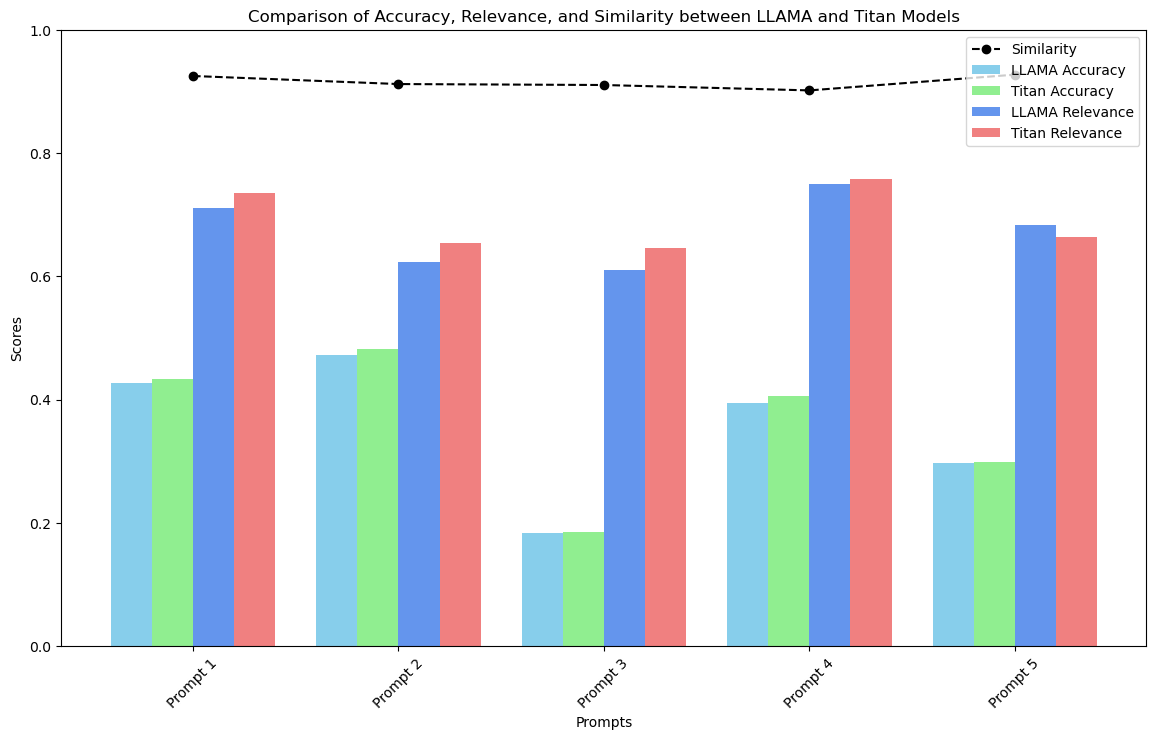

In [20]:
import boto3
import json
from difflib import SequenceMatcher
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Bedrock client for interacting with AWS Bedrock services
client = boto3.client('bedrock-runtime', region_name='us-east-1')

# Load a pre-trained SentenceTransformer model for relevance scoring
# This model converts sentences into dense vector representations for similarity calculations
model = SentenceTransformer('all-MiniLM-L6-v2')

def invoke_model(model_id, prompt_text, input_key, output_key):
    """
    Invoke the model using Bedrock and return the response.
    
    Parameters:
    model_id -- The ID of the model to invoke.
    prompt_text -- The input text prompt to send to the model.
    input_key -- The key used in the JSON body to specify the input.
    output_key -- The key used to extract the generated output from the response.
    
    Returns:
    result -- The model's response parsed from JSON, or None if an error occurs.
    """
    try:
        # Send a request to invoke the specified model with the given input text
        response = client.invoke_model(
            modelId=model_id,
            contentType='application/json',
            accept='application/json',
            body=json.dumps({
                input_key: prompt_text  # Construct JSON body with the input prompt
            })
        )
        # Parse and return the response body as a Python dictionary
        result = json.loads(response['body'].read().decode('utf-8'))
        return result
    except Exception as e:
        # Handle any errors that occur during model invocation
        print(f"Error invoking model {model_id}: {e}")
        return None

def calculate_accuracy(model_output, expected_answer):
    """
    Calculate accuracy as a string similarity ratio between the model output and the expected answer.
    
    Parameters:
    model_output -- The text output generated by the model.
    expected_answer -- The correct or expected answer to compare against.
    
    Returns:
    accuracy -- A similarity ratio between 0 and 1 indicating the accuracy of the model output.
    """
    matcher = SequenceMatcher(None, model_output.lower(), expected_answer.lower())
    return matcher.ratio()

def calculate_relevance(prompt, model_output):
    """
    Calculate relevance using cosine similarity between embeddings of the prompt and the model output.
    
    Parameters:
    prompt -- The original text prompt.
    model_output -- The text output generated by the model.
    
    Returns:
    relevance -- A similarity score between 0 and 1 indicating how relevant the model output is to the prompt.
    """
    # Encode the prompt and model output into vector representations
    prompt_embedding = model.encode([prompt])
    output_embedding = model.encode([model_output])
    # Calculate and return the cosine similarity between the two embeddings
    return cosine_similarity(prompt_embedding, output_embedding)[0][0]

def main():
    # A dictionary mapping each prompt to its expected correct answer
    prompts = {
        "Tell me an interesting fact about Tesla.": "Tesla is named after the famous inventor Nikola Tesla.",
        "What is the capital of France?": "The capital of France is Paris.",
        "How does photosynthesis work?": "Photosynthesis is the process by which green plants and some other organisms use sunlight to synthesize foods with carbon dioxide and water.",
        "Who is the CEO of Apple?": "The CEO of Apple is Tim Cook.",
        "Explain quantum computing in simple terms.": "Quantum computing is a type of computing that uses quantum bits, or qubits, which can be in multiple states at once, unlike classical bits."
    }

    # Lists to store accuracy, relevance, and similarity scores for both models
    llama_accuracy_scores = []
    titan_accuracy_scores = []
    llama_relevance_scores = []
    titan_relevance_scores = []
    similarity_scores = []

    # Iterate over each prompt and its expected answer
    for prompt, expected_answer in prompts.items():
        # Simulate model responses (replace with actual model invocation if needed)
        llama3_result = "Llama 3 generated text for: " + prompt  # Replace with actual model output
        titan_result = "Titan generated text for: " + prompt  # Replace with actual model output

        # Calculate accuracy for both models using the expected answer
        llama_accuracy = calculate_accuracy(llama3_result, expected_answer)
        titan_accuracy = calculate_accuracy(titan_result, expected_answer)

        # Calculate relevance for both models using the prompt and the generated output
        llama_relevance = calculate_relevance(prompt, llama3_result)
        titan_relevance = calculate_relevance(prompt, titan_result)

        # Store the calculated scores in their respective lists
        llama_accuracy_scores.append(llama_accuracy)
        titan_accuracy_scores.append(titan_accuracy)
        llama_relevance_scores.append(llama_relevance)
        titan_relevance_scores.append(titan_relevance)

        # Compare the texts generated by both models and calculate the similarity between them
        similarity = compare_texts(llama3_result, titan_result)
        similarity_scores.append(similarity)

    # Calculate the average accuracy scores for LLAMA and Titan models
    llama_avg_accuracy = np.mean(llama_accuracy_scores)
    titan_avg_accuracy = np.mean(titan_accuracy_scores)

    # Compare the average accuracy scores to determine which model is more accurate
    if llama_avg_accuracy > titan_avg_accuracy:
        print(f"LLAMA is more accurate with an average accuracy of {llama_avg_accuracy:.2f}")
    elif titan_avg_accuracy > llama_avg_accuracy:
        print(f"Titan is more accurate with an average accuracy of {titan_avg_accuracy:.2f}")
    else:
        print("Both models have the same average accuracy.")

    # Create a combined bar chart for accuracy, relevance, and similarity scores
    bar_width = 0.2  # Width of the bars in the bar chart
    index = np.arange(len(prompts))  # X locations for the groups

    plt.figure(figsize=(14, 8))  # Set the figure size for the plot

    # Plot accuracy scores for LLAMA and Titan models
    plt.bar(index, llama_accuracy_scores, bar_width, label='LLAMA Accuracy', color='skyblue')
    plt.bar(index + bar_width, titan_accuracy_scores, bar_width, label='Titan Accuracy', color='lightgreen')

    # Plot relevance scores for LLAMA and Titan models
    plt.bar(index + 2 * bar_width, llama_relevance_scores, bar_width, label='LLAMA Relevance', color='cornflowerblue')
    plt.bar(index + 3 * bar_width, titan_relevance_scores, bar_width, label='Titan Relevance', color='lightcoral')

    # Plot similarity scores as a line plot
    plt.plot(index + 1.5 * bar_width, similarity_scores, marker='o', color='black', linestyle='--', label='Similarity')

    # Set x-axis labels to correspond with the prompts
    plt.xticks(index + 1.5 * bar_width, [f"Prompt {i+1}" for i in range(len(prompts))], rotation=45)
    plt.ylim(0, 1)  # Scale y-axis from 0 to 1 for all metrics

    # Set the title and labels for the plot
    plt.title("Comparison of Accuracy, Relevance, and Similarity between LLAMA and Titan Models")
    plt.ylabel("Scores")
    plt.xlabel("Prompts")
    plt.legend()  # Display the legend

    plt.show()  # Display the plot

if __name__ == "__main__":
    main()  # Call the main function to execute the script



Prompt: Tell me an interesting fact about Tesla.
Similarity: 7.37%

Prompt: What is the capital of France?
Similarity: 1.25%

Prompt: How does photosynthesis work?
Similarity: 4.59%

Prompt: Who is the CEO of Apple?
Similarity: 2.63%

Prompt: Explain quantum computing in simple terms.
Similarity: 3.72%



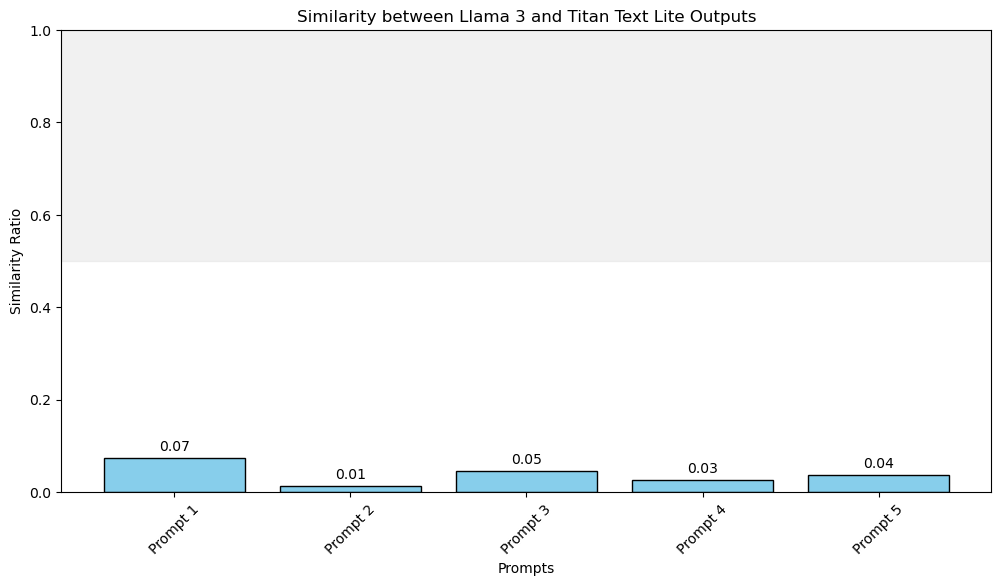

In [22]:
import boto3
import json
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

# Initialize the Bedrock client
# The Bedrock runtime client is initialized with boto3, specifying 'us-east-1' as the AWS region.
# This client will be used to invoke foundation models available in Bedrock.
client = boto3.client('bedrock-runtime', region_name='us-east-1')

def invoke_model(model_id, prompt_text, input_key, output_key):
    """
    Invoke the model using Bedrock and return the response.
    
    Parameters:
    model_id -- The ID of the model to invoke.
    prompt_text -- The input text prompt to send to the model.
    input_key -- The key used in the JSON body to specify the input.
    output_key -- The key used to extract the generated output from the response.
    
    Returns:
    result -- The model's response parsed from JSON, or None if an error occurs.
    """
    try:
        # Sending a request to the Bedrock service to invoke the specified model
        response = client.invoke_model(
            modelId=model_id,
            contentType='application/json',
            accept='application/json',
            body=json.dumps({
                input_key: prompt_text  # Construct JSON body with the input prompt
            })
        )
        # Parse and return the response body as a Python dictionary
        result = json.loads(response['body'].read().decode('utf-8'))
        return result
    except Exception as e:
        # Handle any errors that occur during model invocation
        print(f"Error invoking model {model_id}: {e}")
        return None

def compare_texts(text1, text2):
    """
    Compare two texts and calculate their similarity using SequenceMatcher.
    
    Parameters:
    text1 -- The first text string to compare.
    text2 -- The second text string to compare.
    
    Returns:
    similarity_ratio -- A similarity ratio between 0 and 1 indicating the similarity between the two texts.
    """
    matcher = SequenceMatcher(None, text1, text2)
    similarity_ratio = matcher.ratio()  # Calculate the similarity ratio between the two texts
    return similarity_ratio

def main():
    # List of prompts to send to the models
    prompts = [
        "Tell me an interesting fact about Tesla.",
        "What is the capital of France?",
        "How does photosynthesis work?",
        "Who is the CEO of Apple?",
        "Explain quantum computing in simple terms."
    ]

    similarity_scores = []  # List to store the similarity scores for each prompt

    for prompt in prompts:
        # Invoke Llama 3 model with the current prompt
        llama3_result = invoke_model(
            model_id='meta.llama3-8b-instruct-v1:0',
            prompt_text=prompt,
            input_key='prompt',
            output_key='generation'
        )

        # Extract the generated text from Llama 3 model's response
        if llama3_result and 'generation' in llama3_result:
            llama3_text = llama3_result['generation']
        else:
            llama3_text = ""

        # Invoke Titan Text Lite model with the current prompt
        titan_result = invoke_model(
            model_id='amazon.titan-text-lite-v1',
            prompt_text=prompt,
            input_key='inputText',
            output_key='results'
        )

        # Extract the generated text from Titan Text Lite model's response
        if titan_result and 'results' in titan_result and titan_result['results']:
            titan_text = titan_result['results'][0]['outputText']
        else:
            titan_text = ""

        # Compare the texts generated by both models and calculate the similarity
        if llama3_text and titan_text:
            similarity = compare_texts(llama3_text, titan_text)
            similarity_scores.append(similarity)
            print(f"Prompt: {prompt}")
            print(f"Similarity: {similarity:.2%}\n")
        else:
            similarity_scores.append(0)
            print(f"Prompt: {prompt}")
            print("One or both models did not return a valid output.\n")

    # Plot the similarity scores for all prompts
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(prompts)), similarity_scores, color='skyblue', edgecolor='black')
    plt.xticks(range(len(prompts)), [f"Prompt {i+1}" for i in range(len(prompts))], rotation=45)
    plt.ylim(0, 1)  # Set y-axis from 0 to 1

    # Highlight the range between 0.5 and 1 by shading or using a different color
    plt.axhspan(0.5, 1, color='lightgrey', alpha=0.3)  # Shade the 0.5 to 1 range

    plt.title("Similarity between Llama 3 and Titan Text Lite Outputs")
    plt.ylabel("Similarity Ratio")
    plt.xlabel("Prompts")

    # Annotate the bars with the similarity scores
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

    plt.show()  # Display the plot

if __name__ == "__main__":
    main()  # Execute the main function


            